In [1]:
import numpy as np
import matplotlib.pyplot as plt # noqa
import ozzy as oz # noqa
import ozzy.fields as flds # noqa
import ozzy.plot as oplt # noqa
import xarray as xr

## Define test data

In [162]:
x = np.linspace(0,100,1001)
xv, yv = np.meshgrid(x,x)

In [163]:
vert = np.sin(xv)
hor = np.sin(yv)
linvert = yv*np.sin(xv)
single = yv * xv
diag = np.sin(-xv-yv)
mult = np.sin(xv) - 0.1*np.exp(0.1*yv)*np.sin(xv-yv)

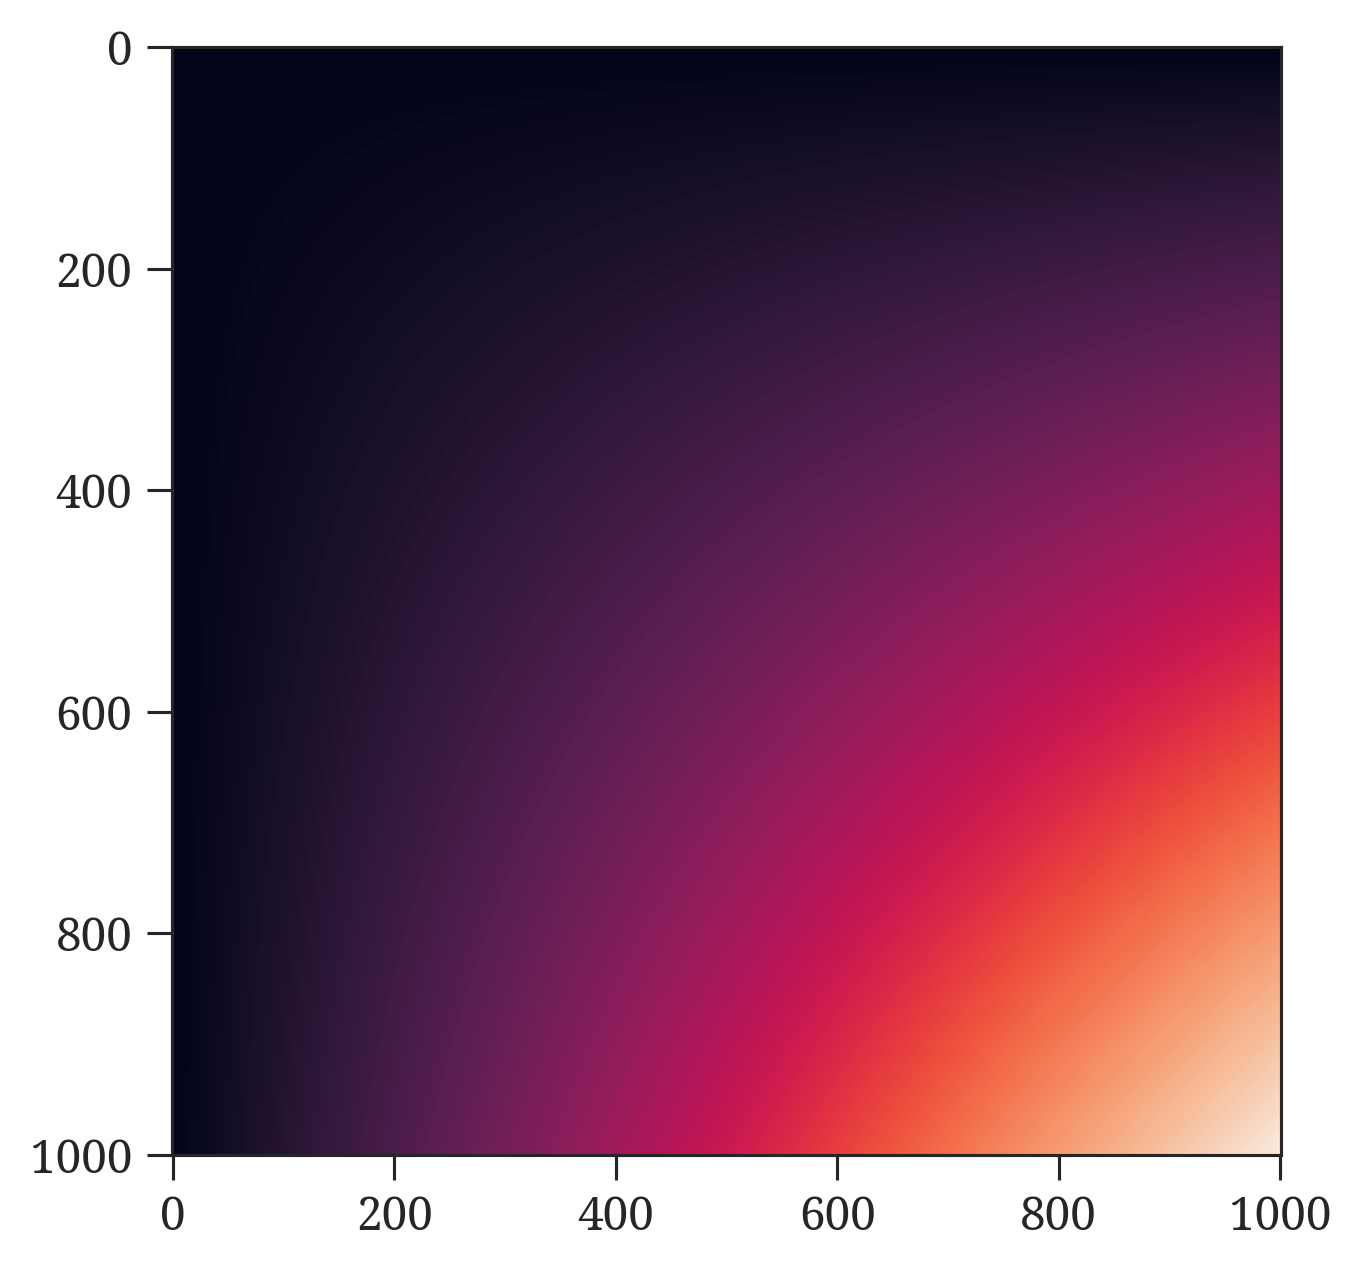

In [164]:
plt.imshow(single)

## Signal to noise ratio

In [165]:
arr = np.random.rand(100)
axis = 0

a = np.asanyarray(arr)
m = a.mean(axis)
sd = a.std(axis=axis)
res =  np.where(sd == 0, 0, m/sd)
res

array(1.74179324)

In [166]:
da = xr.DataArray(diag, coords={'t': x,'x1': x})

## Tests

In [167]:
def _get_kaxis(axis, real=False):
    nx = axis.size
    dx = (axis[-1] - axis[0]) / nx

    if real:
        kaxis = 2 * np.pi * np.fft.rfftfreq(nx, dx)
    else:
        kaxis = 2 * np.pi * np.fft.fftshift(np.fft.fftfreq(nx, dx))
    return kaxis

def get_kaxis(axis):
    nx = axis.size
    dx = (axis[-1] - axis[0]) / nx

    kmin = - np.pi/dx * (1-2/nx)
    kmax = np.pi/dx

    dk = (kmax - kmin) / nx

    kaxis = np.linspace(kmin+0.5*dk, kmax-0.5*dk, nx)

    print(dk)
    print(kaxis[1]-kaxis[0])

    return kaxis


def get_snr(data):
    # mu = np.mean(data)
    mx = np.max(data)
    sd = np.std(data)
    return mx/sd

### Entire region

In [168]:
def get_vphi(data, x, t):

    kx = _get_kaxis(x)
    kt = _get_kaxis(t)

    fftdata = abs(np.fft.fftshift(np.fft.fft2(data, norm='forward')))

    inds = np.argmax(fftdata)
    indt, indx = np.unravel_index(inds, fftdata.shape)

    dkx = kx[1] - kx[0]
    dkt = kt[1] - kt[0]

    vphi_min = 1 - (kt[indt]+0.5*dkt)/(kx[indx]-0.5*dkx)
    vphi_max = 1 - (kt[indt]-0.5*dkt)/(kx[indx]+0.5*dkx)

    vphi = 1.0 - kt[indt]/kx[indx]

    print(f"vphi = {vphi}")
    print(f"dvphi_min = {vphi - vphi_min}")
    print(f"dvphi_max = {vphi_max - vphi}")
    print(f"SNR of FFT = {get_snr(fftdata)}")

    return fftdata, kx, kt



In [169]:
fftdata, kx, kt = get_vphi(diag, x, x)
get_snr(fftdata[249:,:])

vphi = 0.0
dvphi_min = -0.06060606060606022
dvphi_max = -0.06451612903225779
SNR of FFT = 696.9369432085344


604.0738061514692

(-5.0, 5.0, -5.0, 5.0)

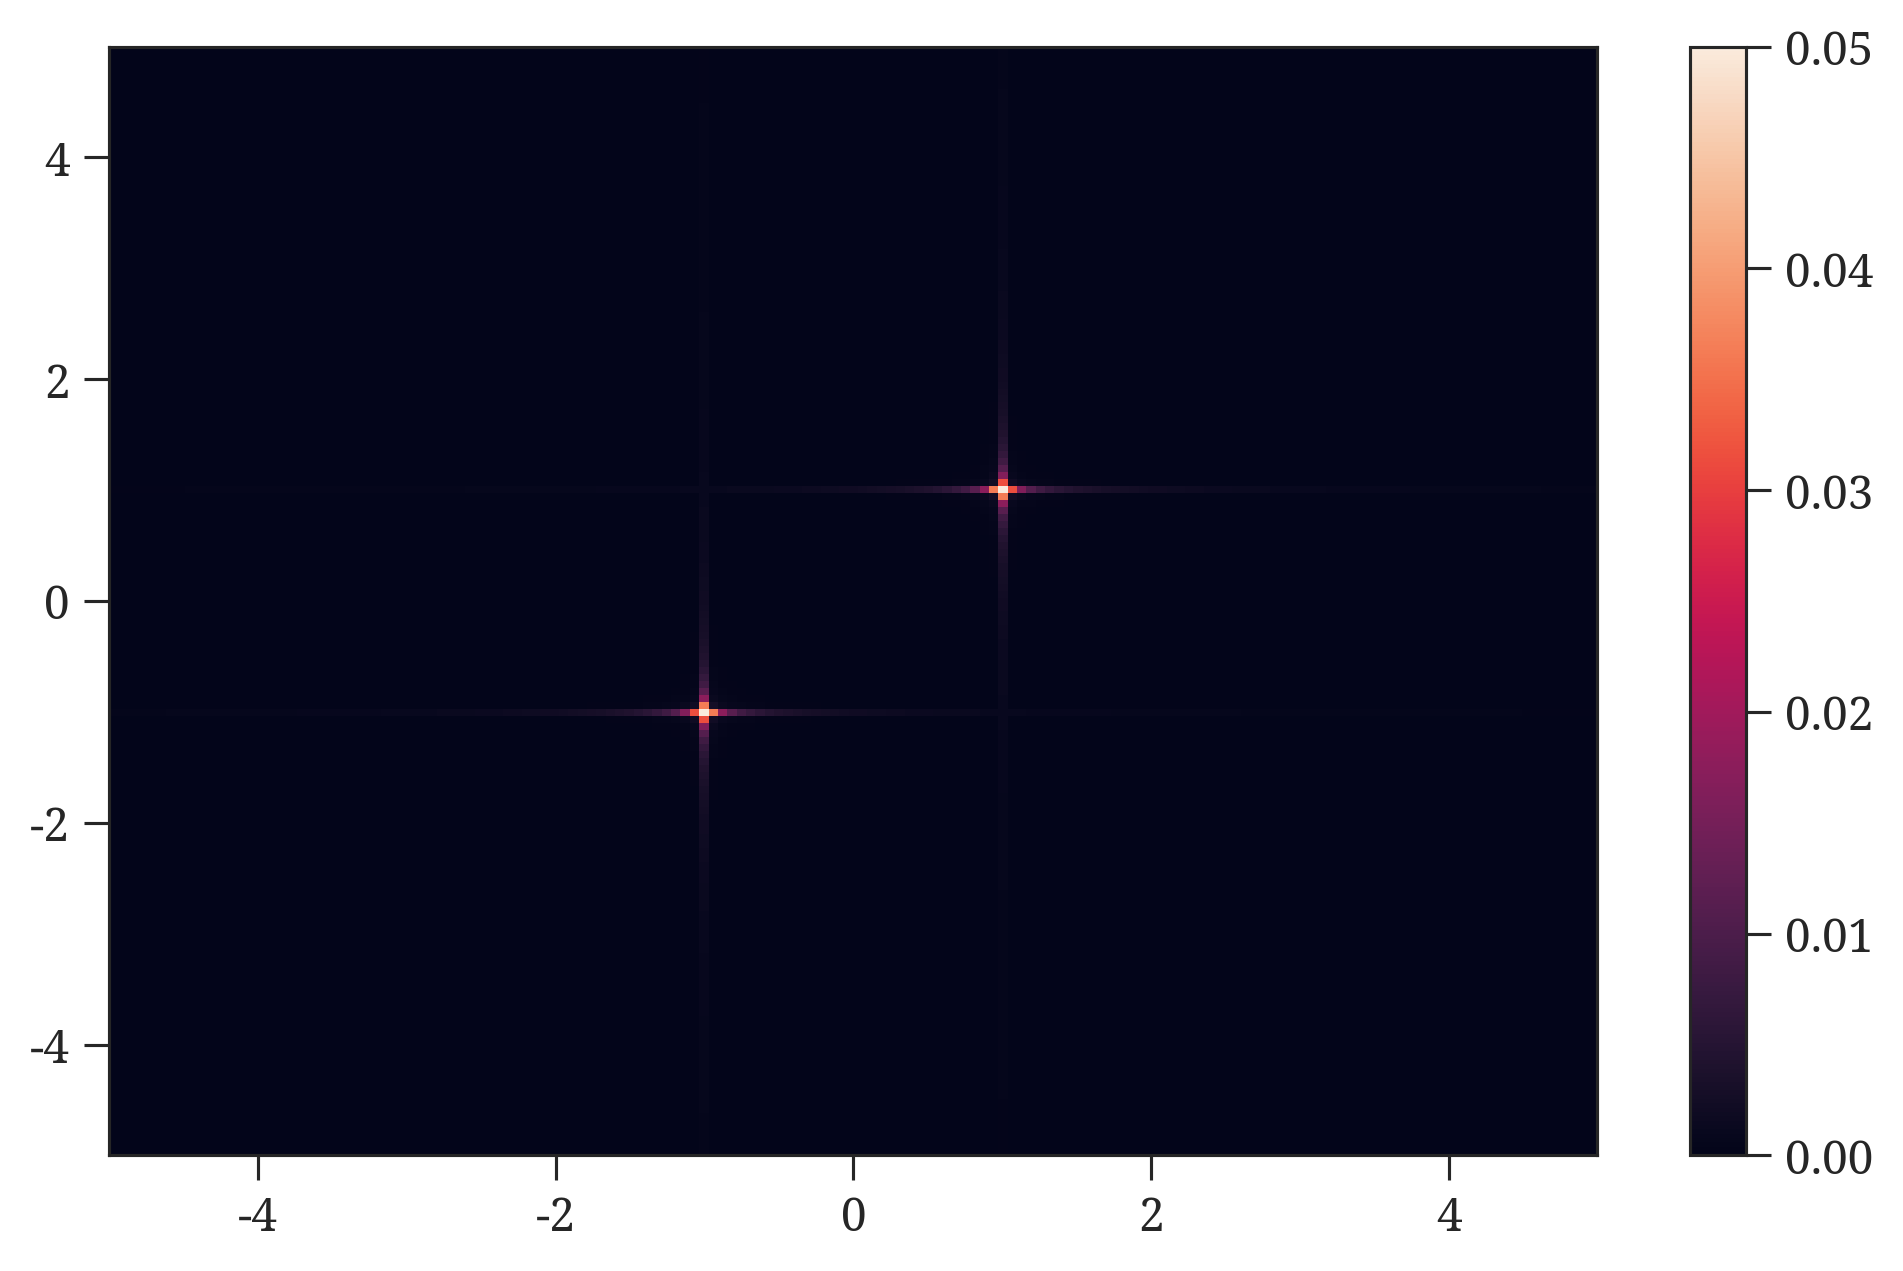

In [170]:
plt.pcolormesh(kx, kt, fftdata)
plt.colorbar()
plt.clim(0,0.05)
plt.axis((-5,5, -5, 5))


In [171]:
dx=401

fftdata, kx, kt = get_vphi(diag[:,0:dx], x[0:dx], x)
get_snr(fftdata)

vphi = -0.06666666666666665
dvphi_min = 0.1333333333333313
dvphi_max = 0.11282051282051131
SNR of FFT = 345.2618003701756


345.2618003701756

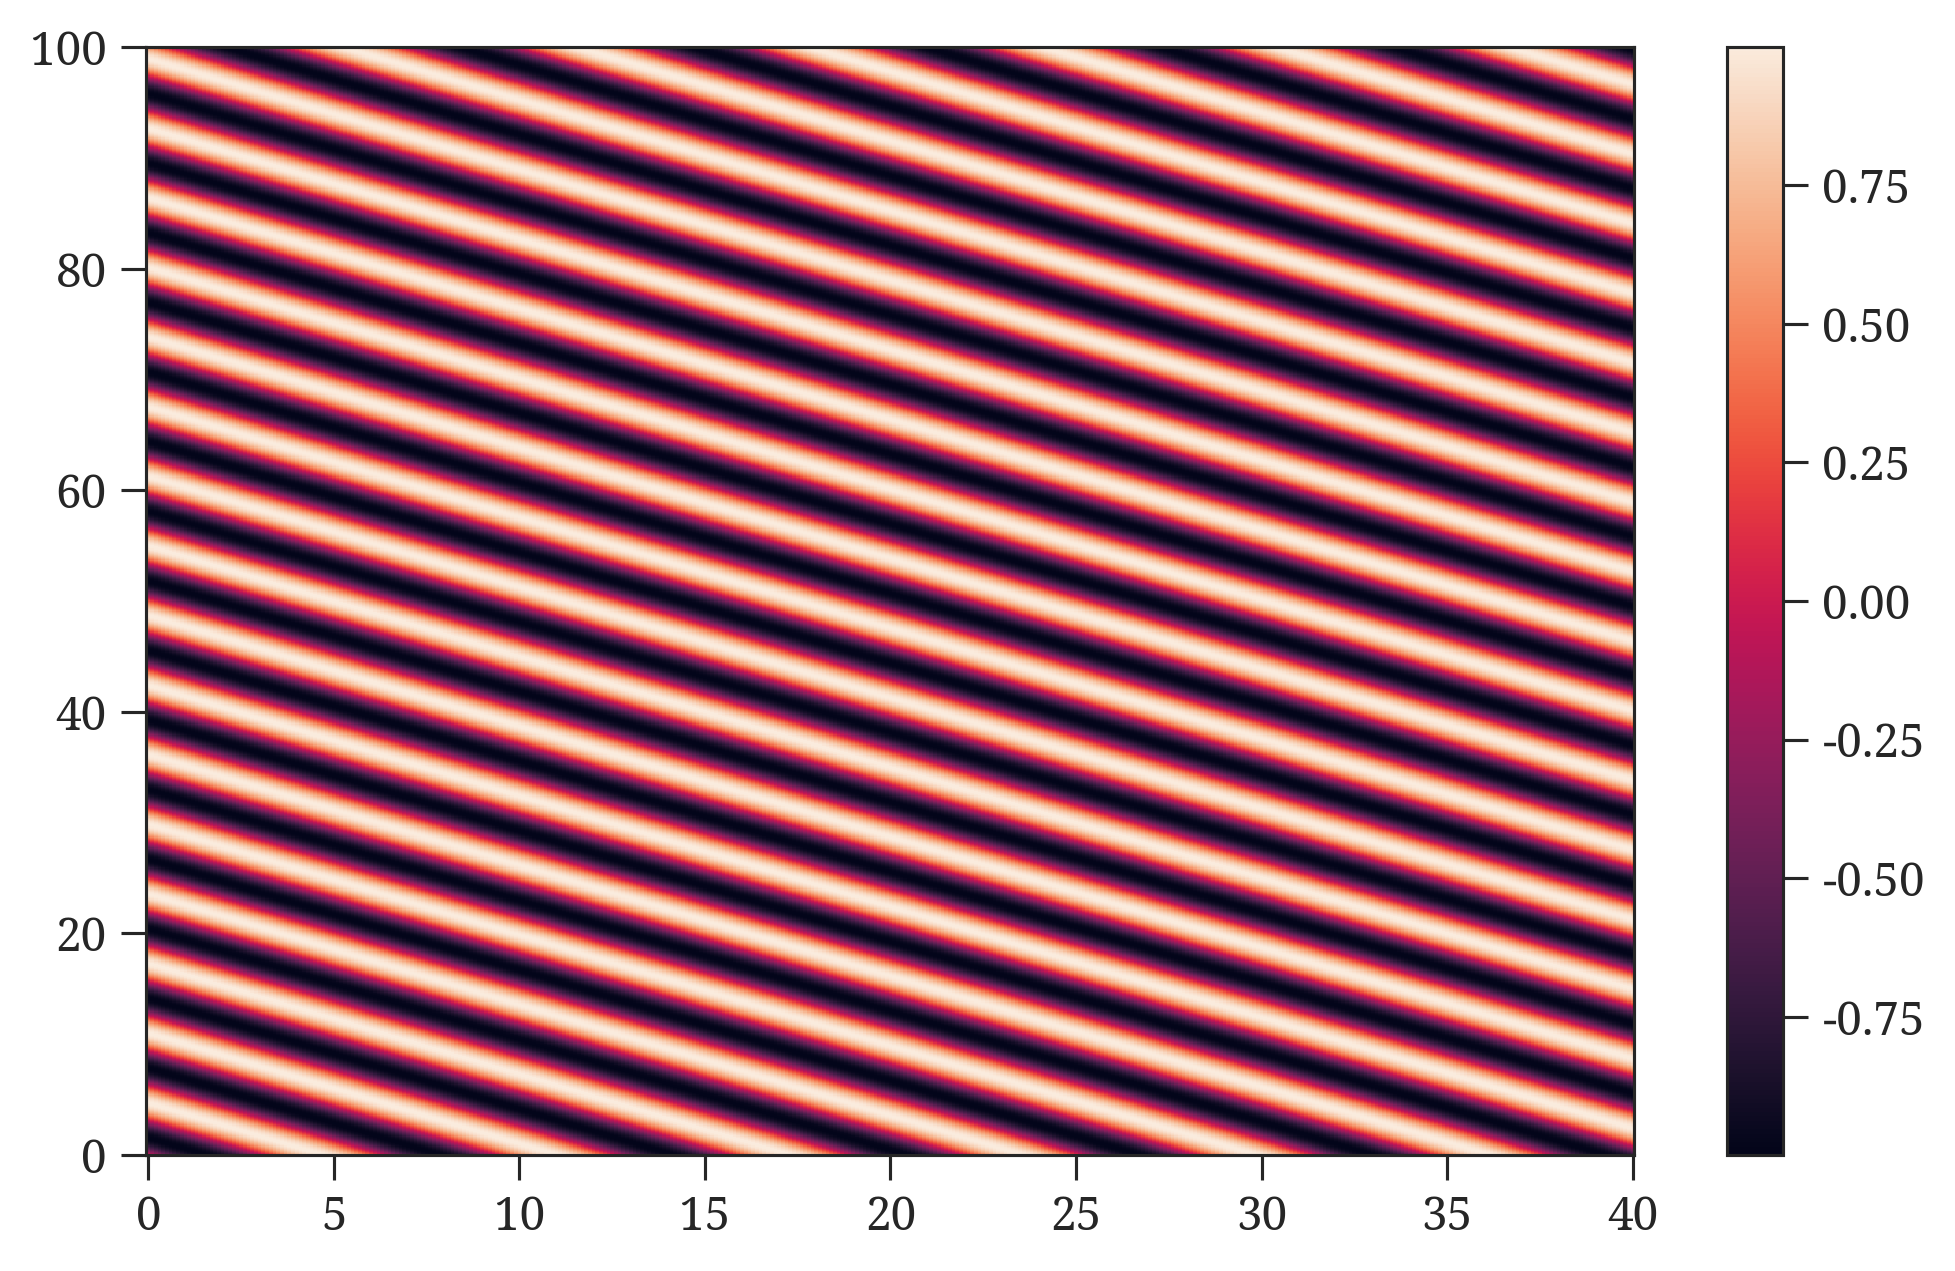

In [172]:
plt.pcolormesh(x[0:dx], x, diag[:,0:dx])
plt.colorbar()
# plt.clim(0,0.05)
# plt.axis((-1,1, -1, 1))


(-5.0, 5.0, -5.0, 5.0)

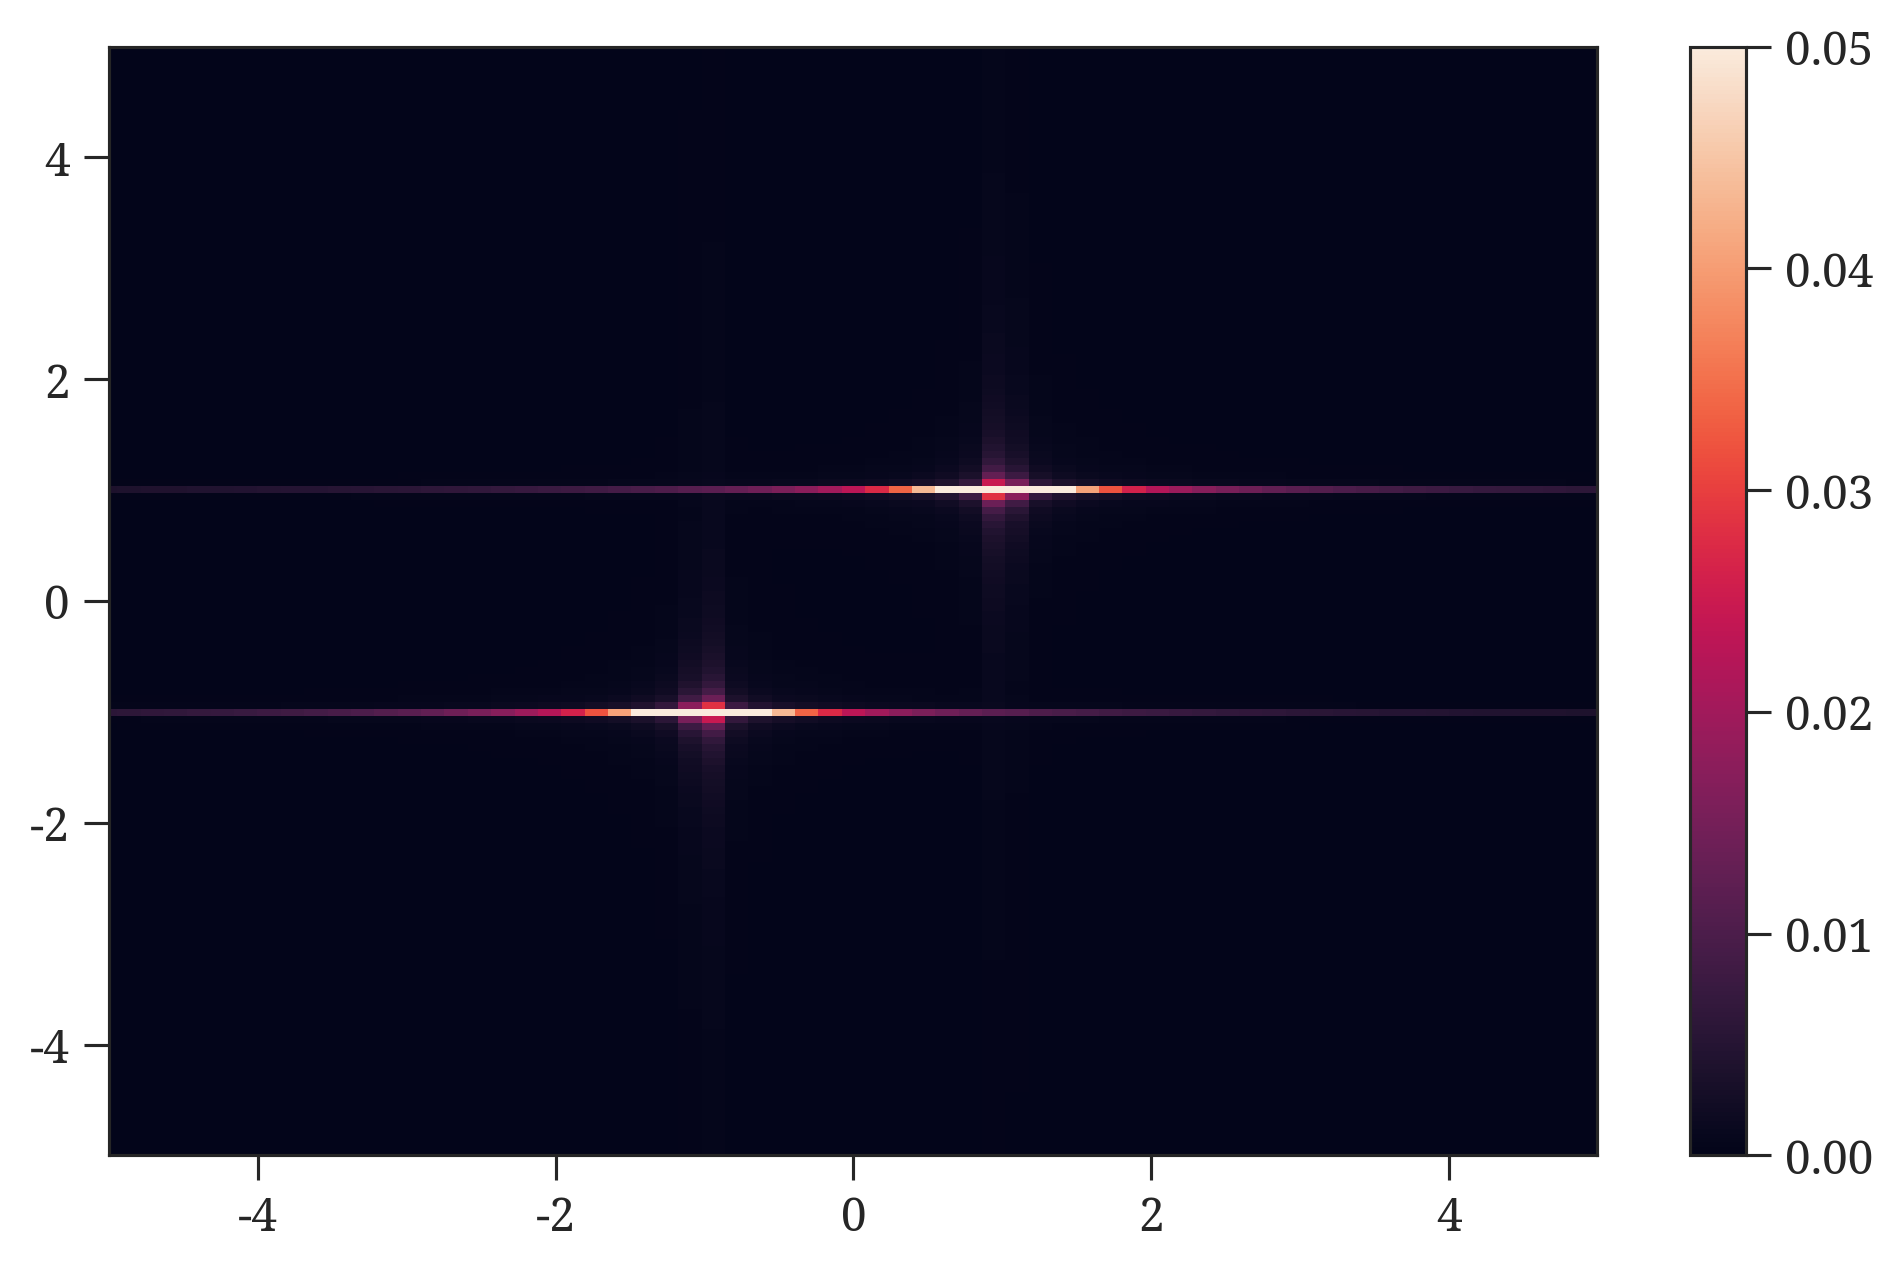

In [173]:
plt.pcolormesh(kx, kt, fftdata)
plt.colorbar()
plt.clim(0,0.05)
plt.gca().axis((-5,5, -5, 5))


In [174]:
dx=401

fftdata, kx, kt = get_vphi(diag[0:dx,0:dx], x[0:dx], x[0:dx])
get_snr(fftdata)

vphi = 0.0
dvphi_min = 0.18181818181817833
dvphi_max = 0.1538461538461513
SNR of FFT = 171.3608195904862


171.3608195904862

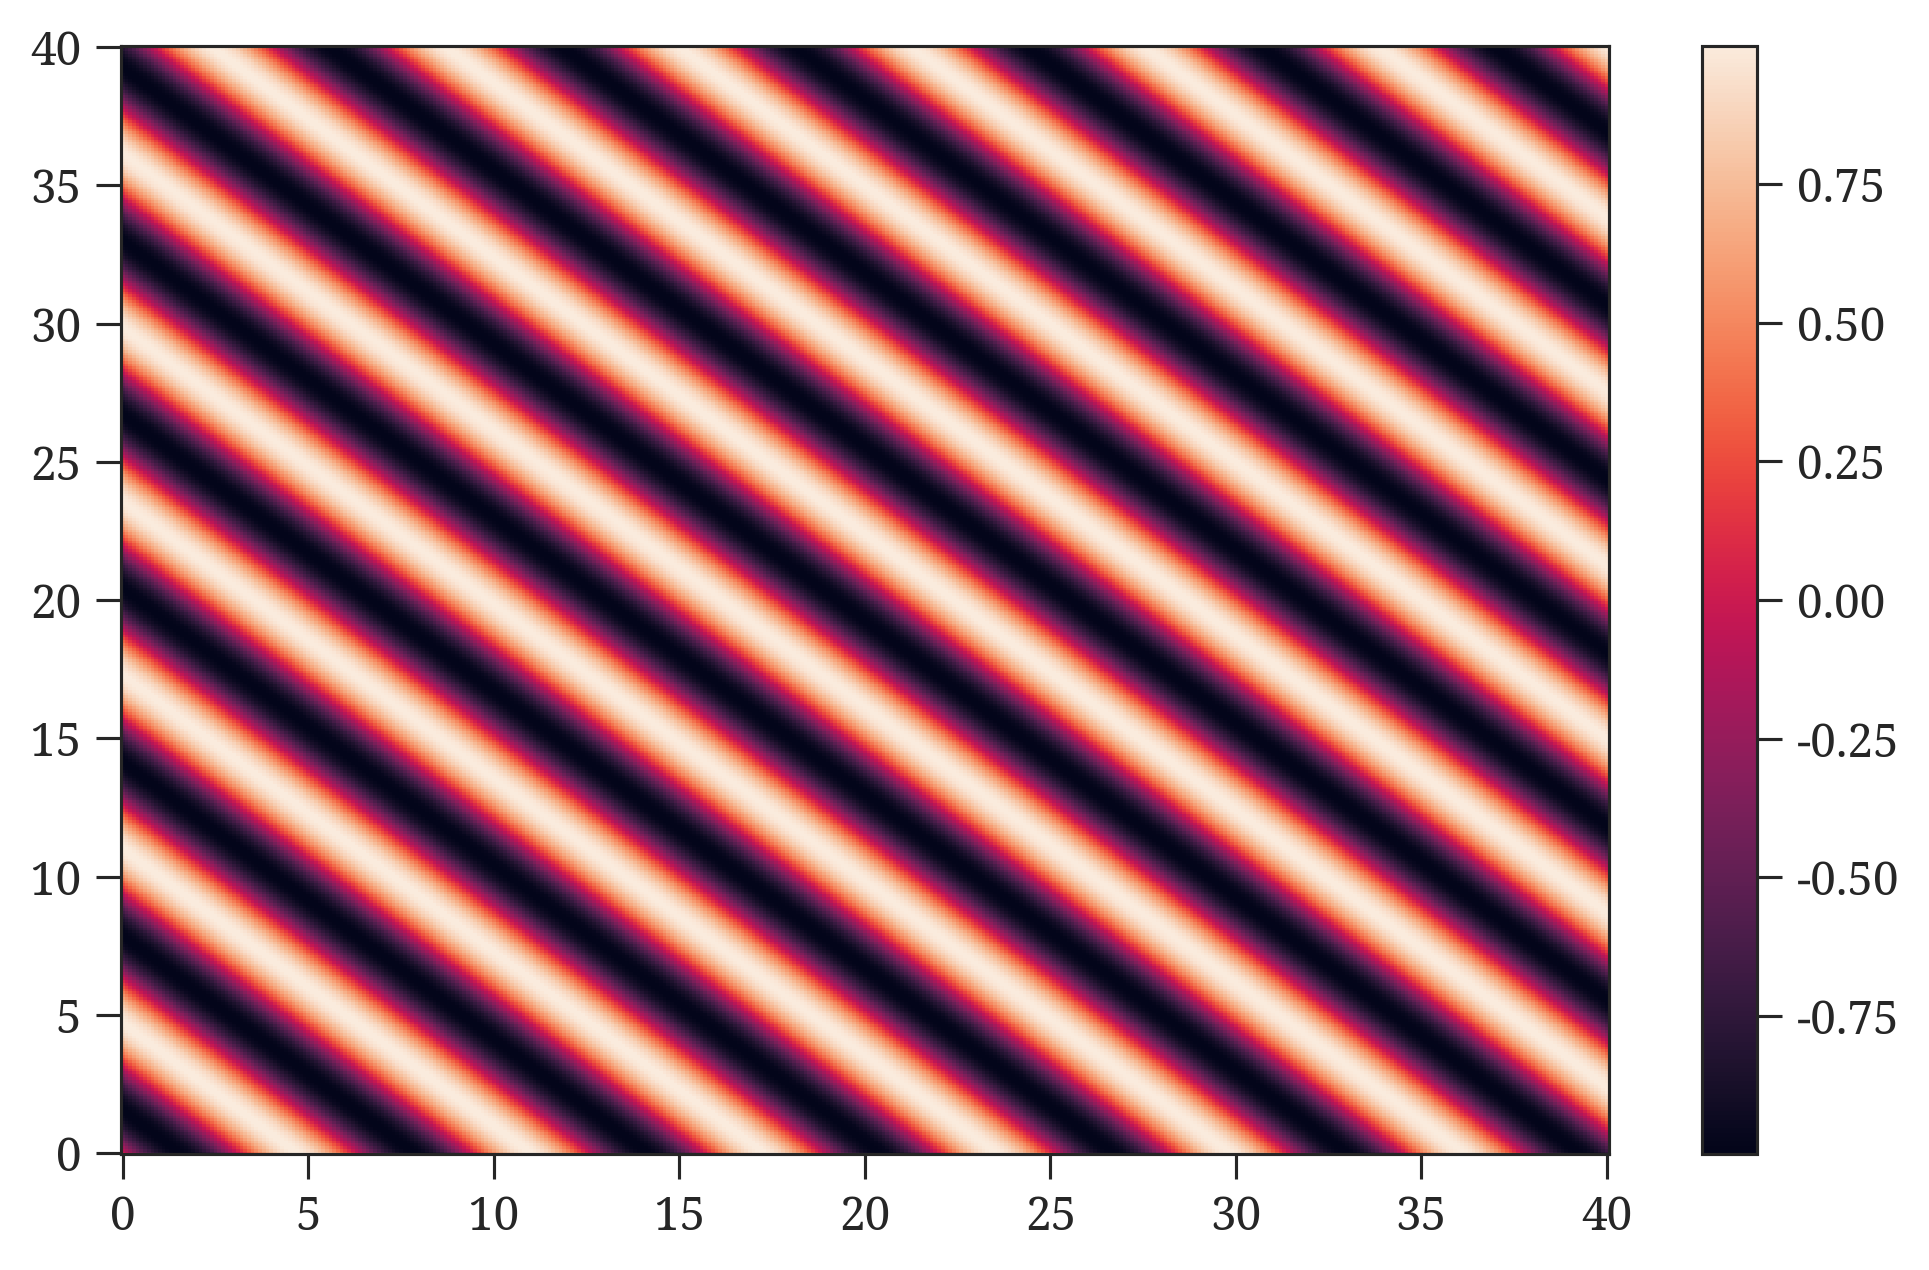

In [178]:
plt.pcolormesh(x[0:dx], x[0:dx], diag[0:dx,0:dx])
plt.colorbar()
# plt.clim(0,0.05)
# plt.axis((-1,1, -1, 1))


(-5.0, 5.0, -5.0, 5.0)

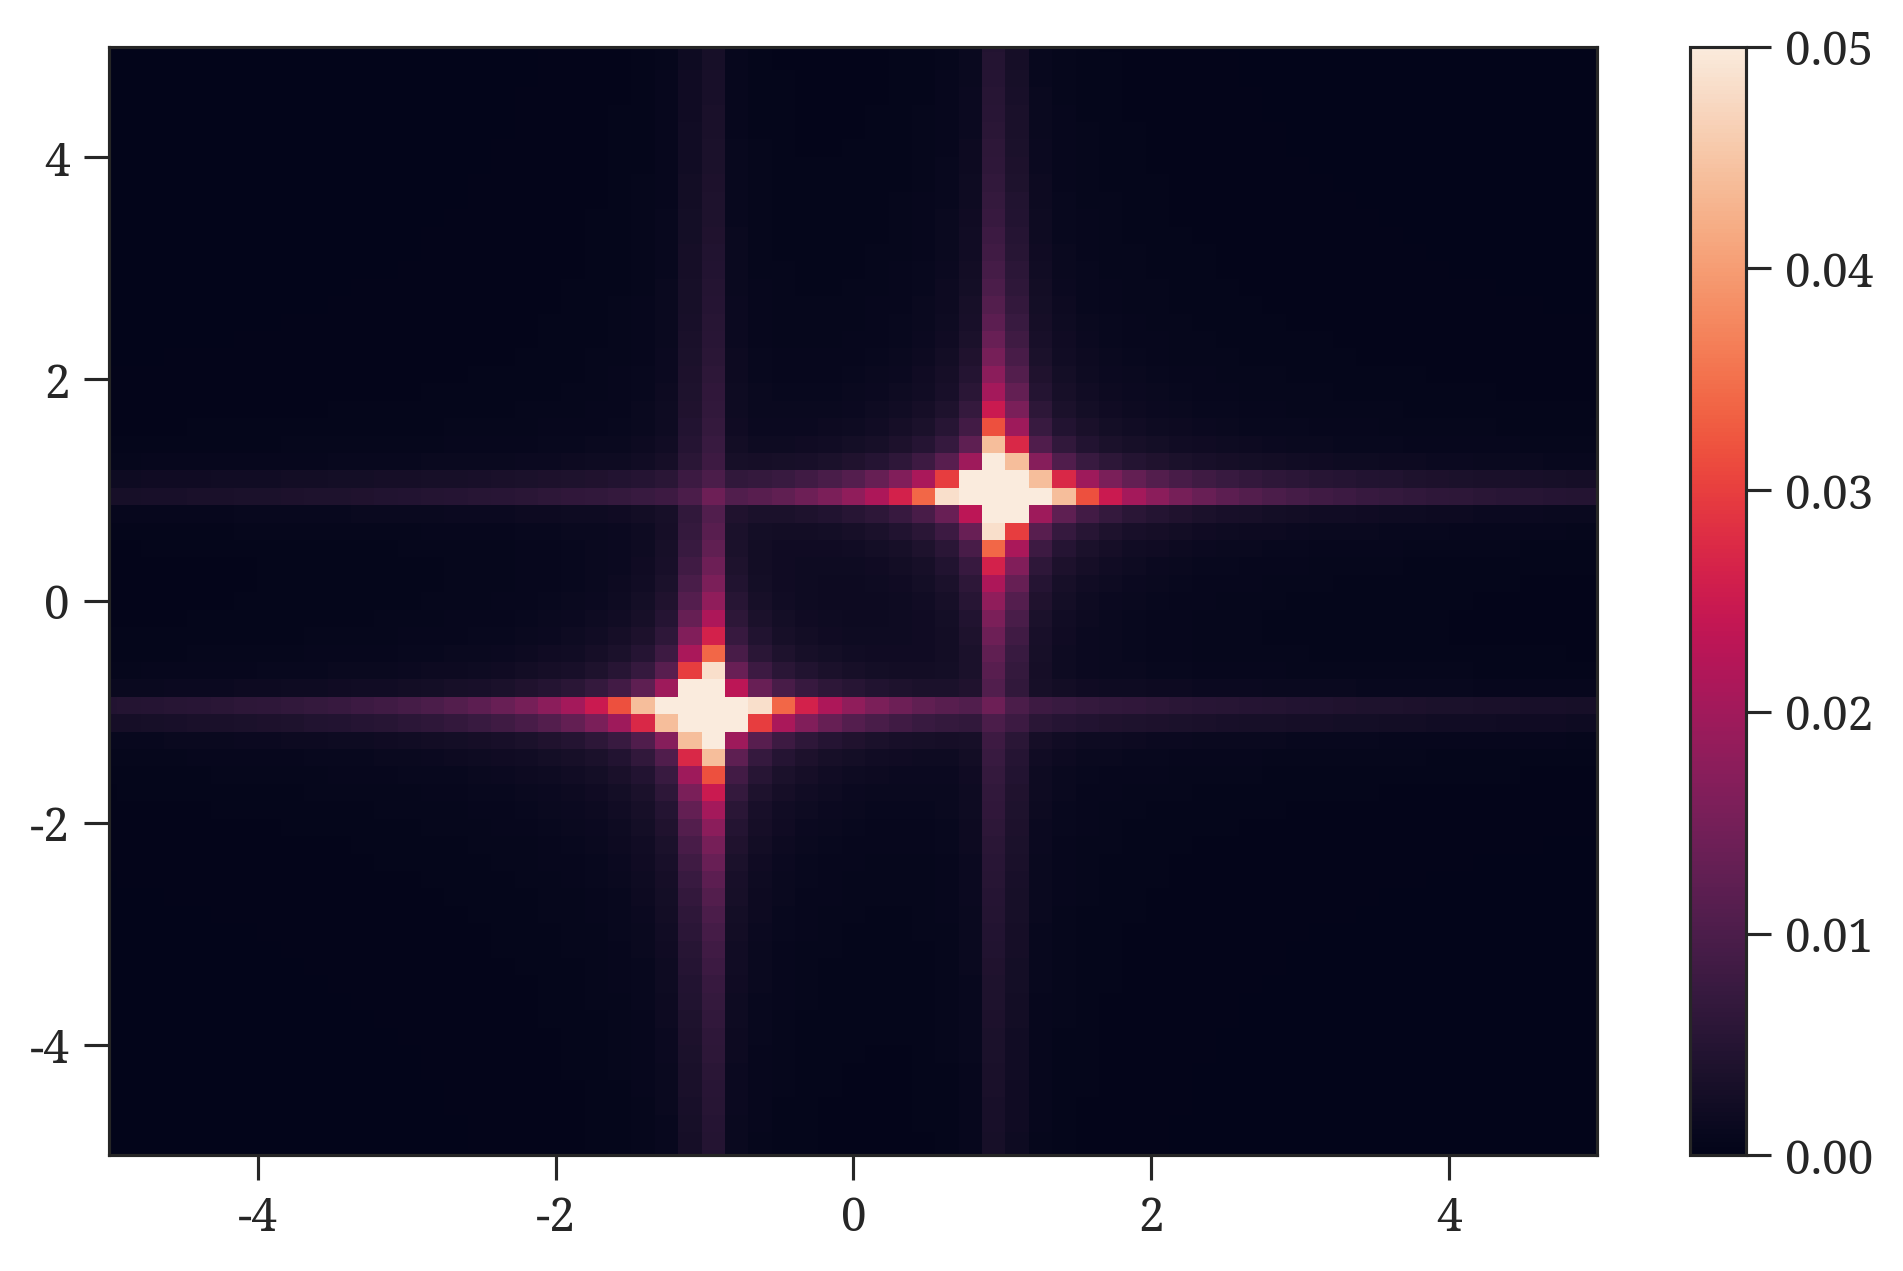

In [176]:
plt.pcolormesh(kx, kt, fftdata)
plt.colorbar()
plt.clim(0,0.05)
plt.gca().axis((-5,5, -5, 5))


In [142]:
kx[2]-kx[1]

1.5707963267948912

In [48]:
fftdata = get_vphi(mult, x, x)

vphi = 1.0
SNR of FFT = 310.47149096309187


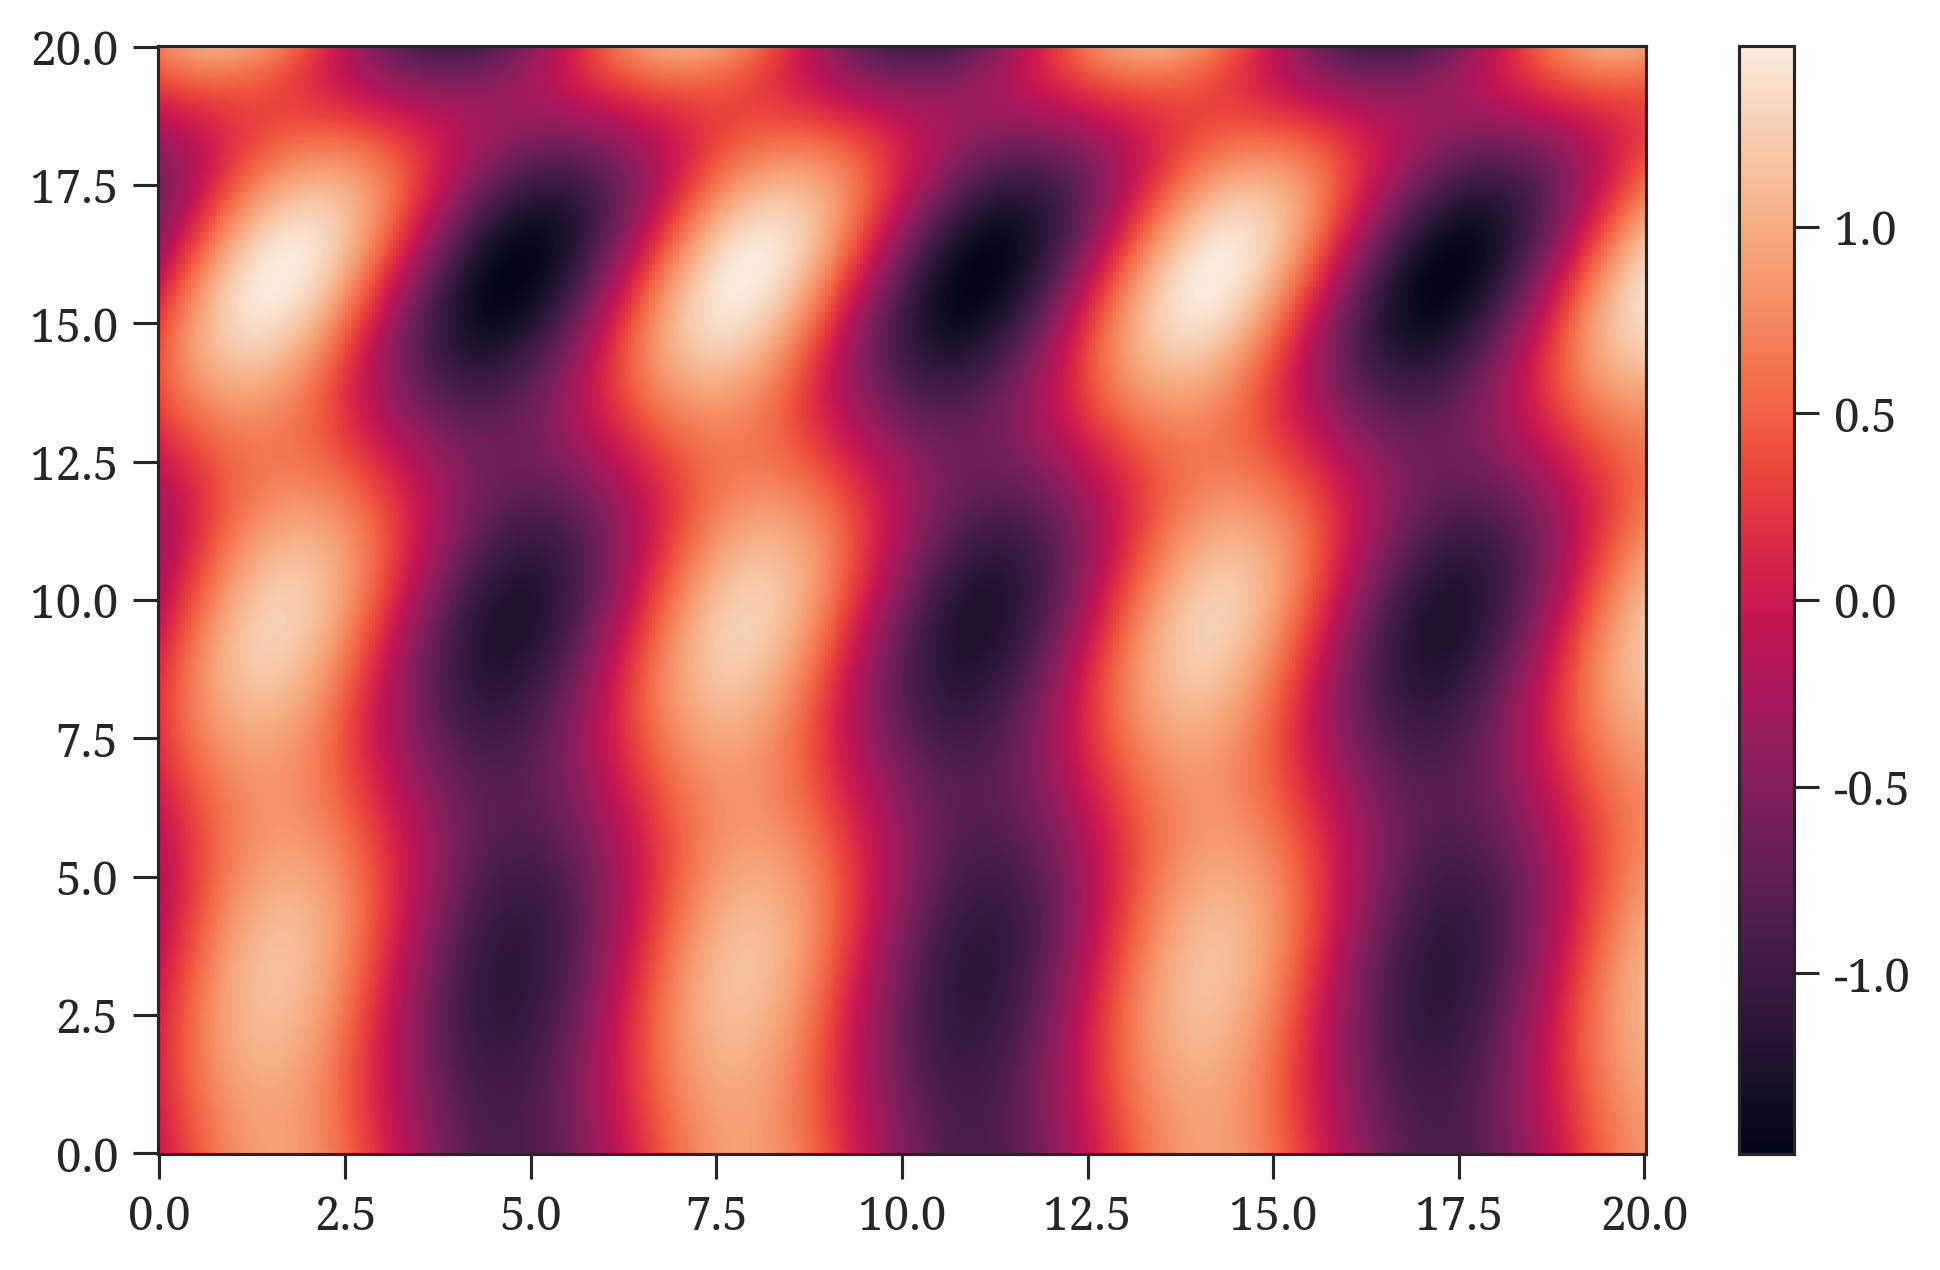

In [37]:
plt.pcolormesh(x, x, mult)
plt.colorbar()
# plt.clim(0,0.05)
# plt.axis((-1,1, -1, 1))


(-1.0, 1.0, -1.0, 1.0)

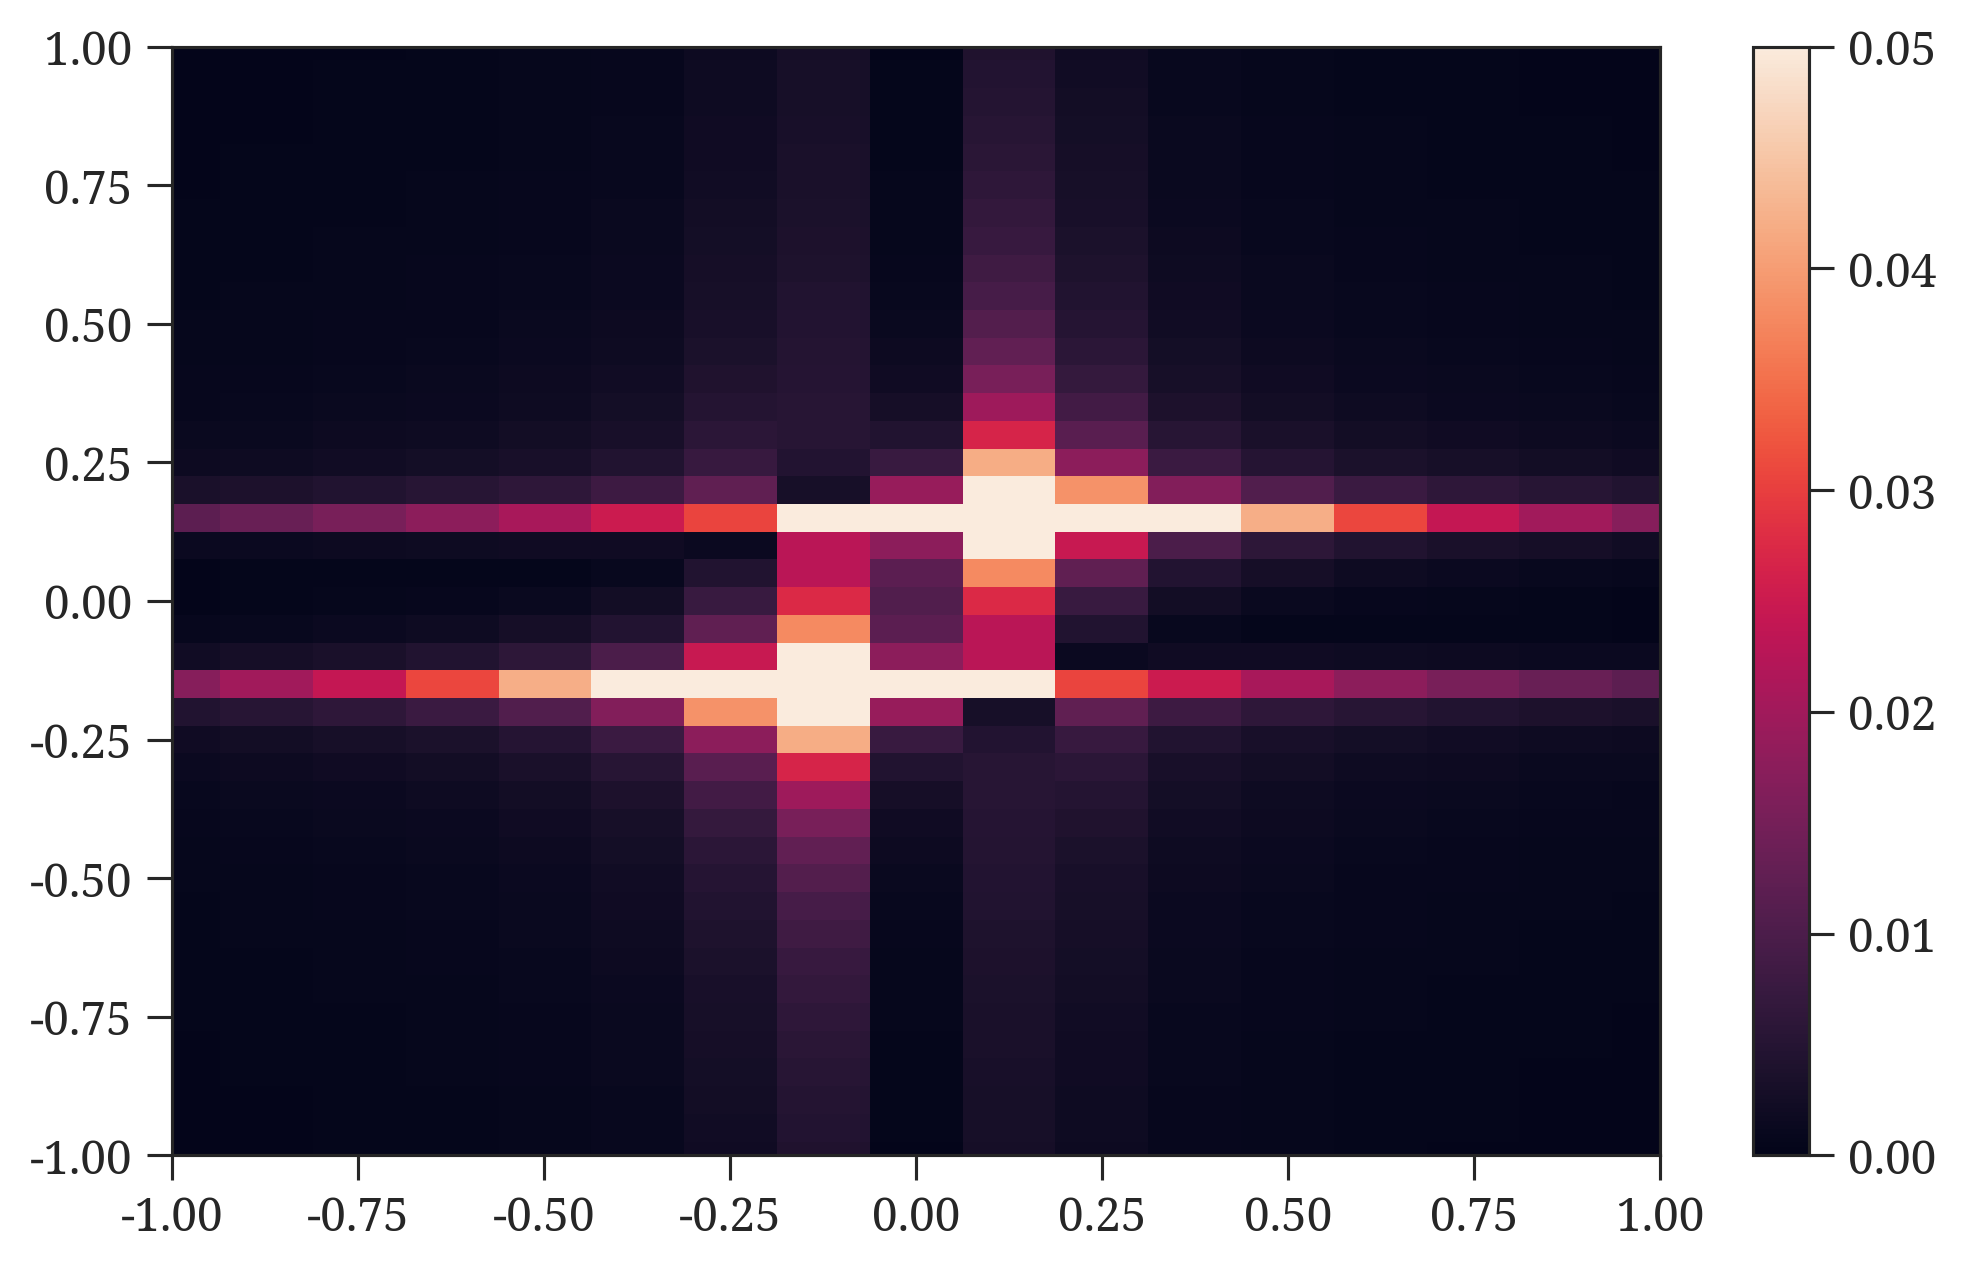

In [78]:
plt.pcolormesh(kx, kt, fftdata)
plt.colorbar()
plt.clim(0,0.05)
plt.axis((-1,1, -1, 1))


In [77]:
dx = 2*round(2*np.pi / (x[1]-x[0]))

# dx = 11
dt = x.size

xwin = x[0:dx]
twin = x[0:dt]

kx = _get_kaxis(xwin, real=True)
kt = _get_kaxis(twin)
Kx, Kt = np.meshgrid(kx, kt)
vphi_map = 1.0 - Kt / Kx
vphi_map[np.where(Kx == 0)] = 0


fftdata = abs(np.fft.fftshift(np.fft.rfft2(diag[0:dt,0:dx], norm='forward'), axes=0))
fftdata[np.where(Kx == 0)] = 0
factor = np.nansum(fftdata)
fftdata2 = fftdata / factor



vphi_all =  np.nansum(fftdata2 * vphi_map)
vphi_all

/var/folders/1l/wxbt57_x5pd0k02tzrbzdzvh0000gn/T/ipykernel_25272/2799077454.py:12: RuntimeWarning: divide by zero encountered in divide
  vphi_map = 1.0 - Kt / Kx
/var/folders/1l/wxbt57_x5pd0k02tzrbzdzvh0000gn/T/ipykernel_25272/2799077454.py:12: RuntimeWarning: invalid value encountered in divide
  vphi_map = 1.0 - Kt / Kx


0.22633439464170024

In [80]:
np.max(fftdata2)

0.28495328586060764

In [83]:
inds = np.where(fftdata2 == np.max(fftdata2))

In [89]:
1 - kt[inds[0]] / kx[inds[1]]

array([0.05911824])

## Try to use vphi diagnostic

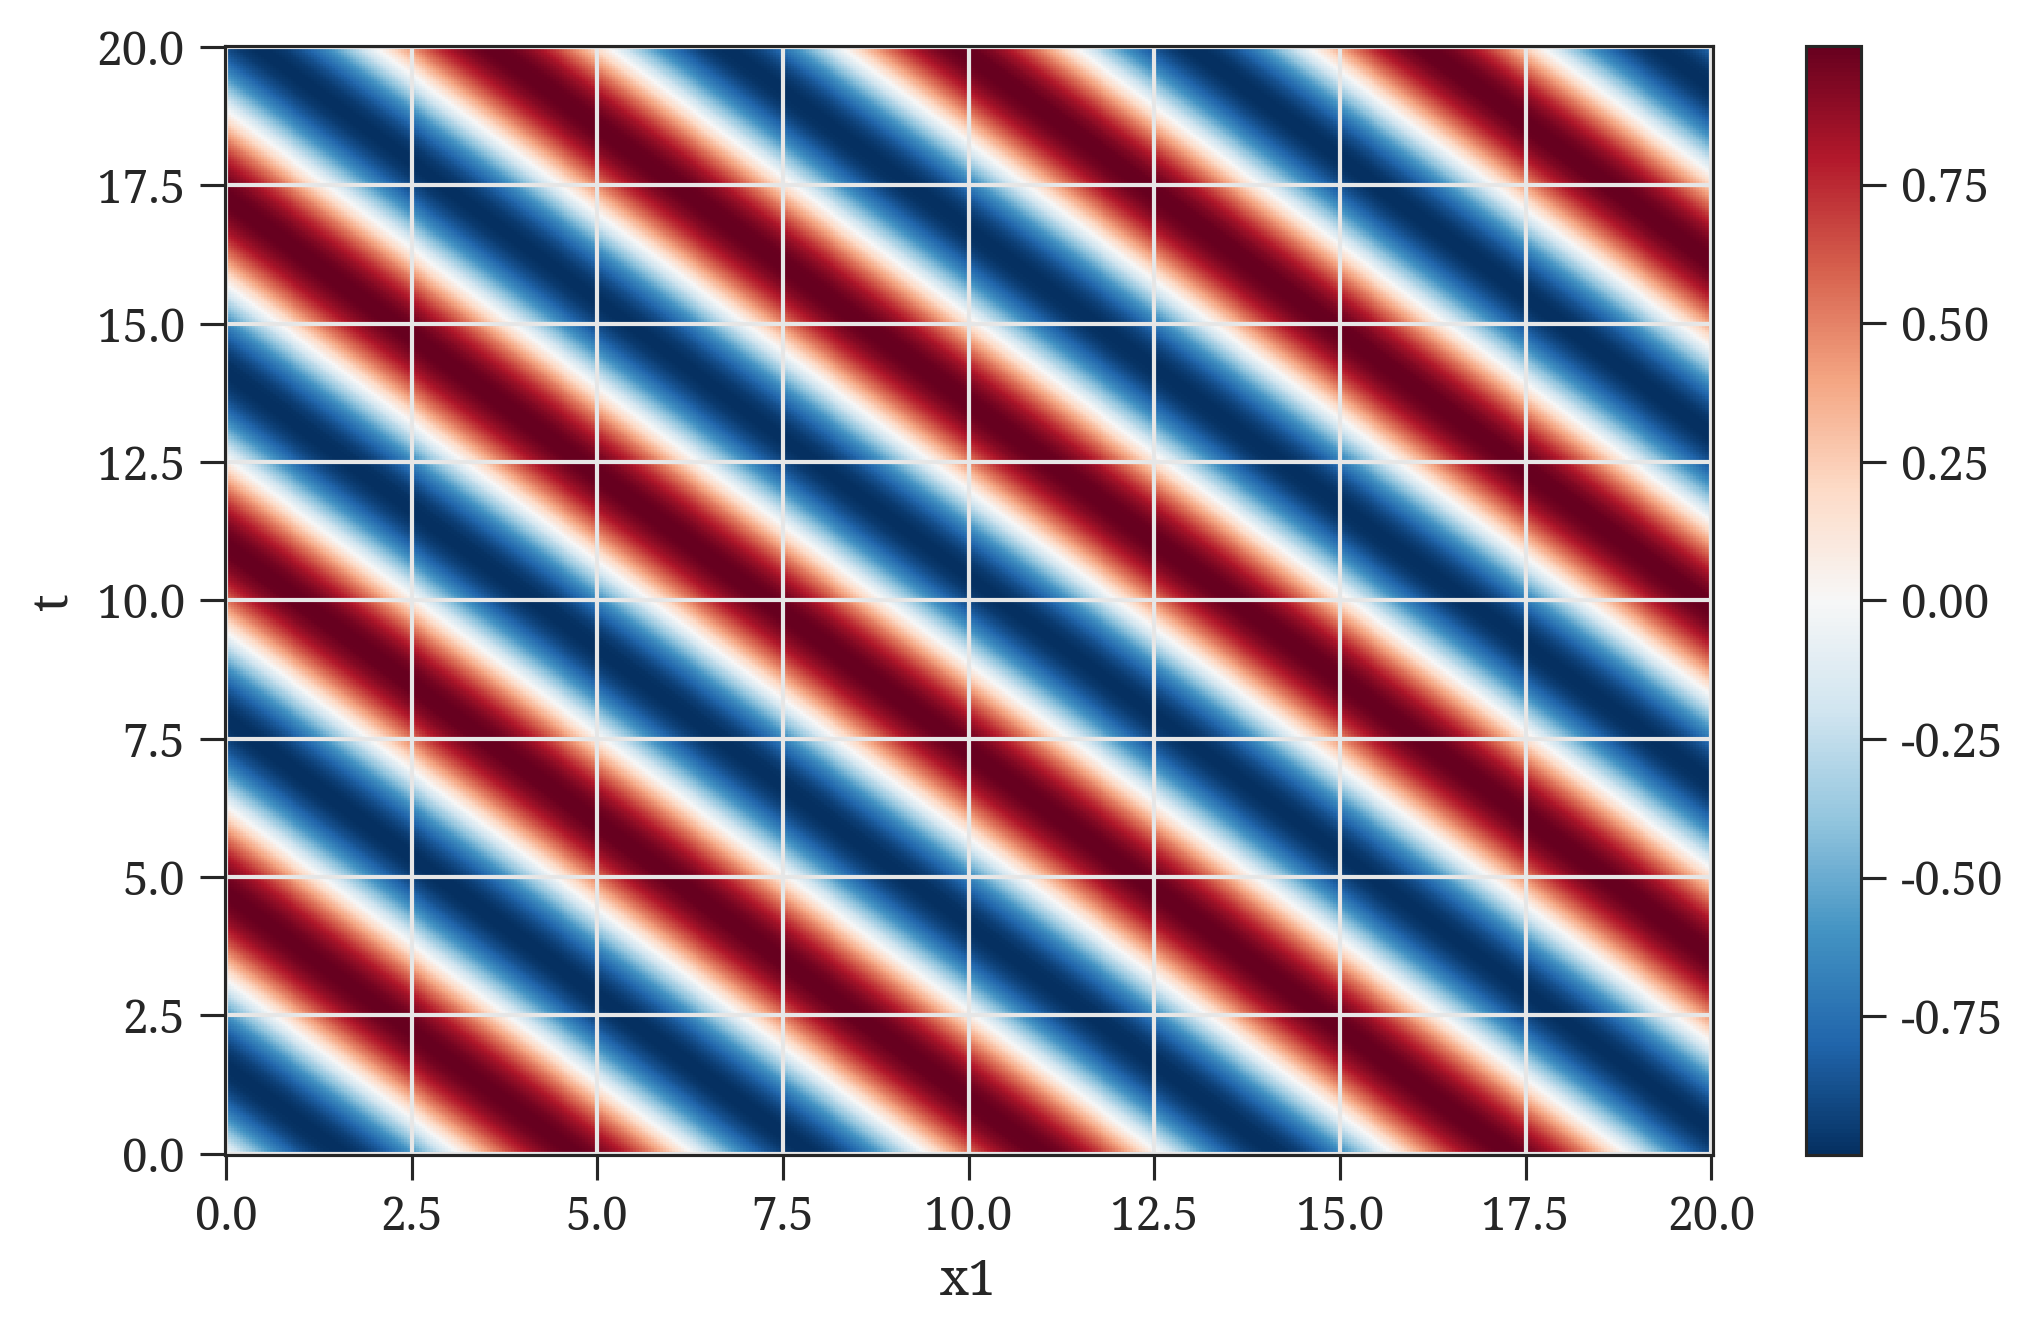

In [5]:
da.plot.imshow()

In [ ]:
vphi = flds.ave_vphi_from_waterfall(da, dcells=(3, 11))

In [ ]:
vphi.plot()